<a href="https://colab.research.google.com/github/liangjieddd/Keras-Faster-RCNN/blob/master/Multi_input_output.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Model
from keras.layers import Lambda,Activation,Dense,Conv2D,Input,BatchNormalization,MaxPooling2D,Flatten
import keras.backend as K
import numpy as np


Using TensorFlow backend.


In [2]:
input_tensor_1 = Input([32,32,3])
input_tensor_2 = Input([4,])
input_target = Input([2,])


In [0]:
def cus_loss1(y_true,y_pred):
  return K.mean(K.abs(y_true-y_pred))
  pass
def cus_loss2(y_true,y_pred):
  return K.mean(K.abs(y_true-y_pred))
  pass

In [4]:
#网络结构
#第一组
x = BatchNormalization(axis=1)(input_tensor_1)

x = Conv2D(filters=32,kernel_size=(3,3),padding='same')(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2,2))(x)

x = Conv2D(filters=32,kernel_size=(3,3),padding='same')(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2,2))(x)

x = Flatten()(x)
x = Dense(units=16)(x)
out2 = Dense(units=2)(x)

#第二组
y = Dense(units=32)(input_tensor_2)
out1 = Dense(units=2)(y)

#第三组
z = Dense(units=8)(input_target)
out3 = Dense(units=2)(z)

#自定义loss
loss1 = Lambda(lambda x:cus_loss1(*x),name='loss1')([out2,out1]) #realdate-predata=loss
loss2 = Lambda(lambda x:cus_loss2(*x),name='loss2')([out3,out2])



In [0]:
model = Model(inputs=[input_tensor_1,input_tensor_2,input_target],outputs=[out1,out2,out3,loss1,loss2])

In [0]:
# 获取loss
loss_layer1 = model.get_layer('loss1').output
loss_layer2 = model.get_layer('loss2').output

# add loss in model
model.add_loss(loss_layer1)
model.add_loss(loss_layer2)


In [7]:
#loss+None 表示不需要梯度返回，有多少个out就有多少个none
model.compile(optimizer='sgd',loss=[None,None,None,None,None])

In [0]:
#dataset
def data_gen(number):
  for i in range(number):
    yield [np.random.normal(1,1,size=(1,32,32,3)),
                            np.random.normal(1,1,size=(1,4)),
                                             np.random.normal(1,1,size=(1,2))],[]

dataset = data_gen(10000)

In [9]:
dataset.__next__()

([array([[[[ 0.1447966 ,  0.68826383,  1.09060432],
           [ 0.61501538,  0.72284025,  0.41079748],
           [ 1.60252253,  2.41401532,  0.77852572],
           ...,
           [ 2.009624  ,  1.33086326,  0.25479822],
           [-0.23688128,  1.11807861,  0.64624047],
           [ 2.00826825,  1.14040872,  2.8946851 ]],
  
          [[ 1.60416117,  1.03007006,  1.27246239],
           [ 0.38619279,  1.95070359,  0.39142814],
           [ 0.14563144,  0.64047908, -0.83849971],
           ...,
           [ 1.76344193,  1.35363511, -0.67883207],
           [ 0.39894111,  3.0030589 ,  0.95067984],
           [-0.24208182,  0.41120615,  1.41011751]],
  
          [[ 0.18791066,  1.41835713,  2.30262194],
           [-0.30558667,  1.2064132 ,  0.52443722],
           [ 2.48410529, -0.34849286,  0.85911852],
           ...,
           [-1.06084901, -0.19385841,  0.27240105],
           [ 2.0071365 ,  1.88993402,  1.94694788],
           [ 0.62821486,  0.44060799, -0.15983225]],
  
    

In [10]:
train = model.fit_generator(dataset,epochs=10,steps_per_epoch=20)



Epoch 1/10
20/20 [==============================] - 4s 191ms/step - loss: 1.6519
Epoch 2/10
20/20 [==============================] - 0s 5ms/step - loss: 0.4503
Epoch 3/10
20/20 [==============================] - 0s 5ms/step - loss: 0.2517
Epoch 4/10
20/20 [==============================] - 0s 6ms/step - loss: 0.2155
Epoch 5/10
20/20 [==============================] - 0s 5ms/step - loss: 0.1536
Epoch 6/10
20/20 [==============================] - 0s 5ms/step - loss: 0.1397
Epoch 7/10
20/20 [==============================] - 0s 5ms/step - loss: 0.1501
Epoch 8/10
20/20 [==============================] - 0s 5ms/step - loss: 0.1392
Epoch 9/10
20/20 [==============================] - 0s 5ms/step - loss: 0.1335
Epoch 10/10
20/20 [==============================] - 0s 6ms/step - loss: 0.1576


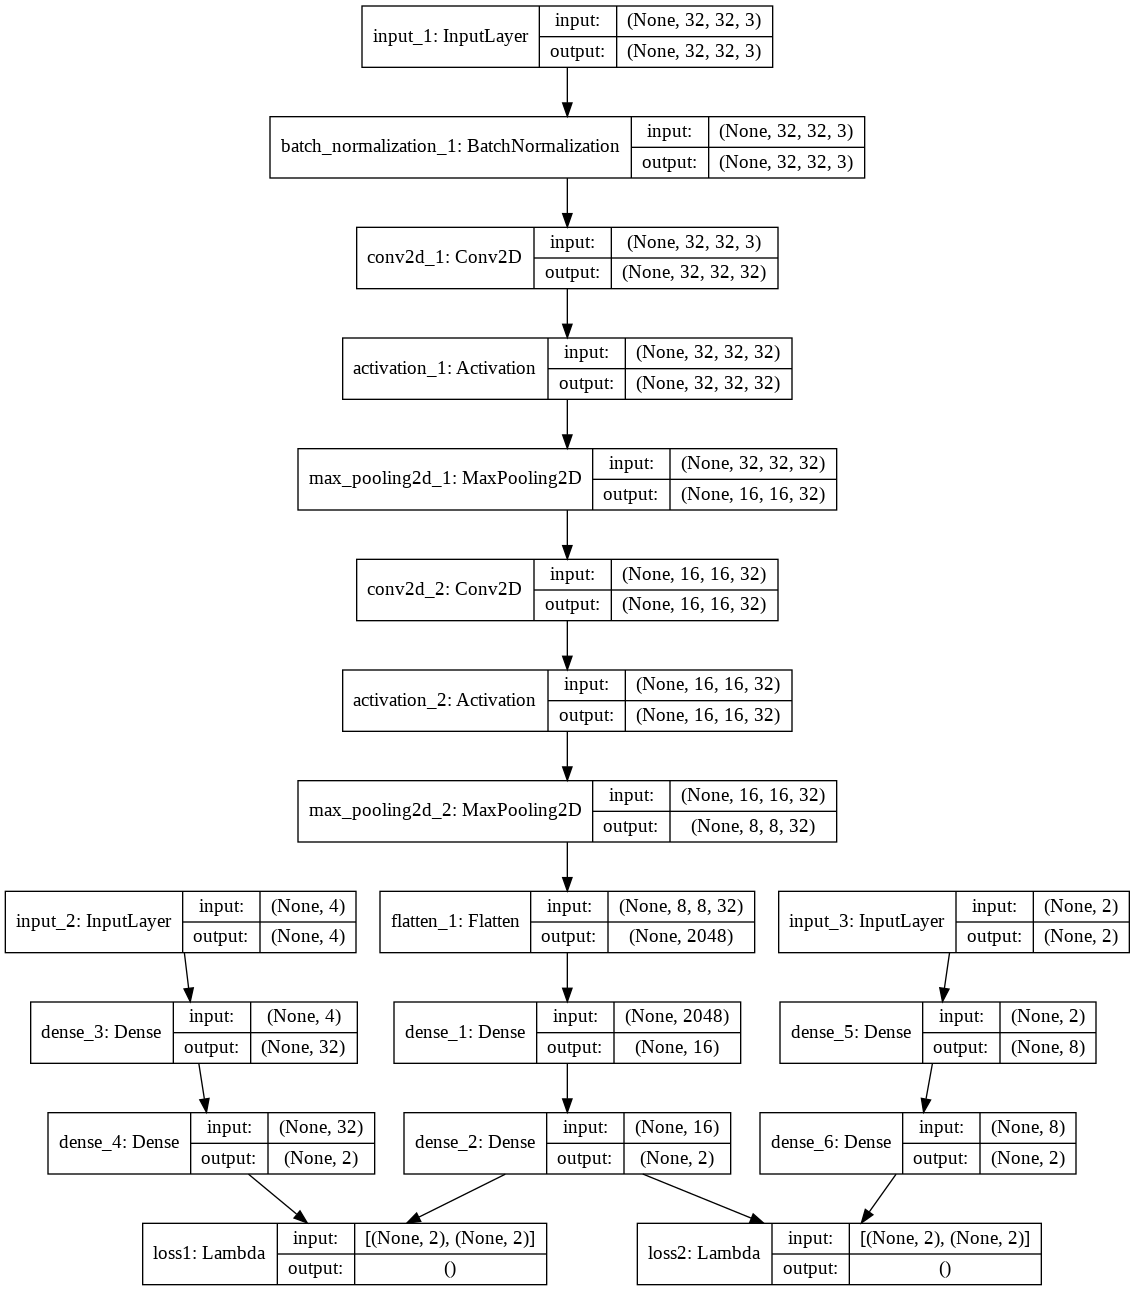

In [11]:
from keras.utils.vis_utils import plot_model
plot_model(model=model,to_file='model_plain_loss.png',show_shapes=True)